In [116]:
import pandas as pd
import pyarrow
import matplotlib.pyplot as plt
import numpy as np
from sklearn.tree import DecisionTreeRegressor, plot_tree
import sklearn
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (
    accuracy_score,
    f1_score,
    classification_report,
    confusion_matrix,
    roc_auc_score,
)
from sklearn import svm
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.metrics import mean_absolute_error
from sklearn.ensemble import RandomForestRegressor


In [2]:
X_train_03_14= pd.read_parquet("C:\\Users\\valif\\OneDrive\\Desktop\\SollIch-Hackathon_Daten\\SollIch-Hackathon_Daten\\Train_X\\2023_03_14_data.pq")
Y2_train_03_14=X_train_03_14['ProzessData_ActData_AB1_Temperature_DR1_WaterMixingStage']
X_train_03_14=X_train_03_14.drop('ProzessData_ActData_AB1_Temperature_DR1_WaterMixingStage', axis=1)

In [3]:
Y2_train_03_14

2023-03-14 01:00:00+00:00    42.0
2023-03-14 01:00:01+00:00    42.0
2023-03-14 01:00:02+00:00    42.0
2023-03-14 01:00:03+00:00    42.0
2023-03-14 01:00:04+00:00    42.0
                             ... 
2023-03-14 19:59:56+00:00    42.0
2023-03-14 19:59:57+00:00    42.0
2023-03-14 19:59:58+00:00    42.0
2023-03-14 19:59:59+00:00    42.0
2023-03-14 20:00:00+00:00    42.0
Name: ProzessData_ActData_AB1_Temperature_DR1_WaterMixingStage, Length: 68401, dtype: float64

In [4]:
Y1_train_03_14=pd.read_parquet("C:\\Users\\valif\\OneDrive\\Desktop\\SollIch-Hackathon_Daten\\SollIch-Hackathon_Daten\\Train_Y\\2023_03_14_target.pq")


In [5]:
X_test_03_16=pd.read_parquet("C:\\Users\\valif\\OneDrive\\Desktop\\SollIch-Hackathon_Daten\\SollIch-Hackathon_Daten\\Eval_X\\2023_03_16_data.pq")
Y2_test_03_16=X_test_03_16['ProzessData_ActData_AB1_Temperature_DR1_WaterMixingStage']
X_test_03_16=X_test_03_16.drop('ProzessData_ActData_AB1_Temperature_DR1_WaterMixingStage', axis=1)
Y1_test_03_16=pd.read_parquet("C:\\Users\\valif\\OneDrive\\Desktop\\SollIch-Hackathon_Daten\\SollIch-Hackathon_Daten\\Eval_Y\\2023_03_16_target.pq")

In [ ]:
norm = StandardScaler()
norm.fit(X_train_03_14)
norm.fit(Y1_train_03_14)
norm.fit(Y2_train_03_14)

X_train_03_14_norm = norm.transform(X_train_03_14)
X_test_norm = norm.transform(X_test_03_16)

Y1_train_03_14_norm=norm.transform(Y1_train_03_14)
Y1_test_03_16_norm=norm.transform(Y1_test_03_16)

Y2_train_03_14_norm=norm.transform(Y2_train_03_14)
Y2_test_03_16_norm=norm.transform(Y2_test_03_16)

In [77]:
dtr=DecisionTreeRegressor()

In [78]:
dtr.fit(X_train_03_14, Y1_train_03_14)

DecisionTreeRegressor()

In [79]:
y_pred=dtr.predict(X_test_03_16)

In [80]:
dtr.score(X_train_03_14,Y1_train_03_14
          )

0.9999963946286307

In [14]:
from sklearn.metrics import mean_absolute_error

In [81]:
dtr.score(X_test_03_16,Y1_test_03_16)

0.9995561001023792

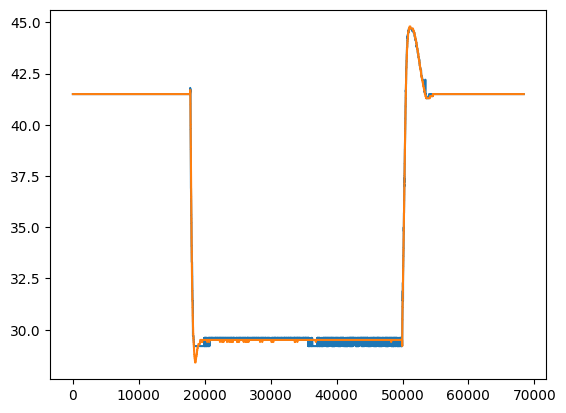

In [82]:
plt.plot(y_pred)
plt.plot(Y1_test_03_16.to_numpy())

In [76]:
mean_absolute_error(Y1_test_03_16,y_pred)

0.0573253270125002

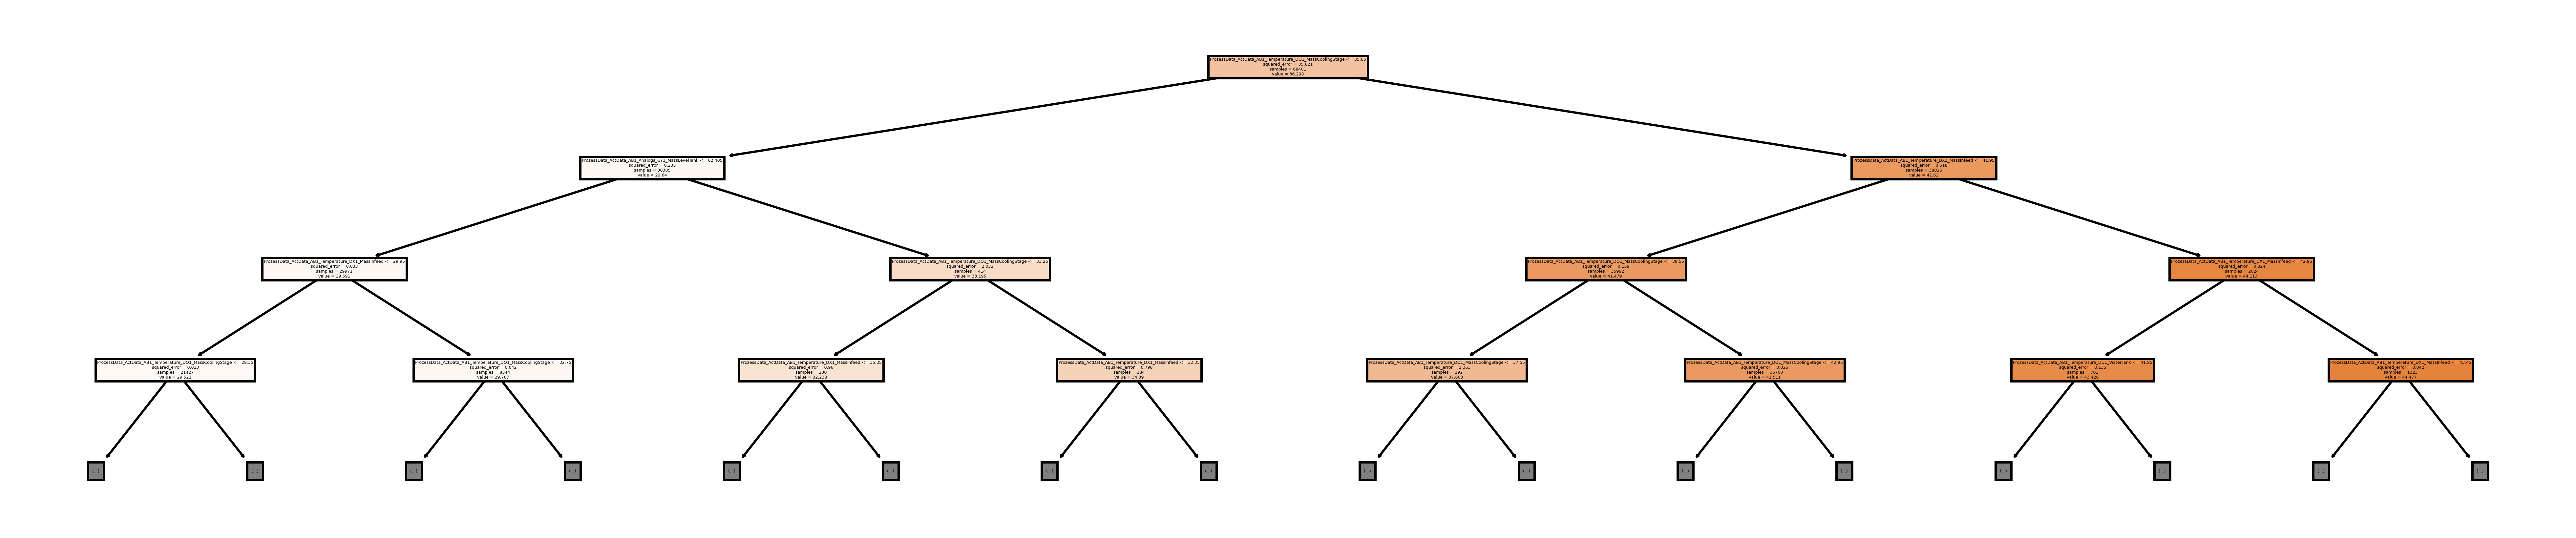

In [83]:
plt.figure(figsize=(20, 4), dpi=500)
plot_tree(dtr, feature_names=X_train_03_14.columns, filled=True, max_depth=3)
plt.show()

## DT tuning

In [92]:
from sklearn.model_selection import KFold
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

In [101]:
param_grid = {
    "splitter":["best","random"],
            "max_depth" : [1,3,5,7,9,11,12],
           "min_samples_leaf":[1,2,3,4,5,6,7,8,9,10],
           "min_weight_fraction_leaf":[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9],
           "max_features":["auto","log2","sqrt",None],
           "max_leaf_nodes":[None,10,20,30,40,50,60,70,80,90]
             }


grid = GridSearchCV(
    DecisionTreeRegressor(),
    param_grid=param_grid,
    cv=KFold(n_splits=5),
    n_jobs=-1,
    refit=True,
    scoring='neg_mean_absolute_error'
)

In [ ]:
grid.fit(X_train_03_14, Y1_train_03_14)

In [ ]:
dtr_best = grid.best_estimator_
print(grid.best_params_, grid.best_score_)

In [99]:
y_pred= dtr_best.predict(X_test_03_16)

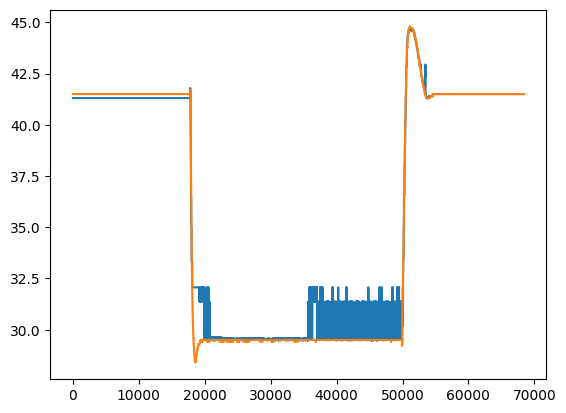

In [100]:
plt.plot(y_pred)
plt.plot(Y1_test_03_16.to_numpy())

In [104]:
def weighted_absolute_error(y_pred,y_true):
    points=0
    for i in range(len(y_true)):
        error=abs(y_pred[i]-y_true[i])
        if 0<=error<=0.05:
            points+=1
        elif 0.5<error<=0.1:
            points+=0.5
        elif 0.1<error<=0.5:
            points+=0.25
        else:
            points+=0
    
    return points


In [108]:
from sklearn.ensemble import RandomForestRegressor

In [121]:
regr = RandomForestRegressor(max_depth=2, random_state=0)
regr.fit(X_train_03_14, np.ravel(Y1_train_03_14))
rfr_pred=regr.predict(X_test_03_16)

In [120]:
np.ravel(Y1_train_03_14)

array([41.5, 41.5, 41.5, ..., 41.5, 41.5, 41.5])

In [112]:
Y1_train_03_14.shape

(68401, 1)

In [119]:
y_pred

array([41.30555561, 41.30555561, 41.30555561, ..., 41.5       ,
       41.5       , 41.5       ])

In [122]:
rfr_pred

array([41.4789566, 41.4789566, 41.4789566, ..., 41.4789566, 41.4789566,
       41.4789566])

In [123]:
weighted_absolute_error(rfr_pred, Y1_test_03_16.to_numpy())

32377.25

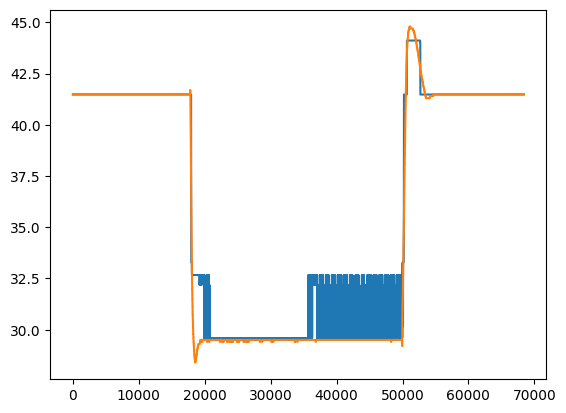

In [124]:
plt.plot(rfr_pred)
plt.plot(Y1_test_03_16.to_numpy())